In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading whale returns
whale_portfolio_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\whale_returns.csv")
whale_data = pd.read_csv(whale_portfolio_data_path, index_col="Date", parse_dates=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Reading algorithmic returns
algo_returns_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_data_path, index_col="Date", parse_dates=True)
algo_returns_data.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna().copy()
algo_returns_data.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
sp_tsx_history_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\sp_tsx_history.csv")
sp_tsx_history_data = pd.read_csv(sp_tsx_history_data_path, index_col="Date", parse_dates=True)
sp_tsx_history_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_data.index.dtype

dtype('<M8[ns]')

In [10]:
sp_tsx_history_data['Close'].dtype

dtype('O')

In [11]:
# Fix Data Types
whale_data.index = pd.to_datetime(whale_data.index)
algo_returns_data.index = pd.to_datetime(algo_returns_data.index)
sp_tsx_history_data.index = pd.to_datetime(sp_tsx_history_data.index)

In [12]:
def cleanup_money(series):
    series = series.str.replace("$", "", regex=False)
    series = series.str.replace(",", "", regex=False)
    series = series.astype("float")
    return series

In [13]:
sp_tsx_history_data["Close"] = cleanup_money(sp_tsx_history_data["Close"])
sp_tsx_history_data.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Calculate Daily Returns
sp_tsx_history_daily_returns = sp_tsx_history_data.pct_change()

In [15]:
# Drop nulls
sp_tsx_history_daily_returns = sp_tsx_history_daily_returns.dropna()
sp_tsx_history_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_daily_returns = sp_tsx_history_daily_returns.rename(columns={'Close': 'SP TSX'})

In [17]:
joined_data_cols = pd.concat(
    [whale_data, algo_returns_data, sp_tsx_history_daily_returns], axis="columns", join="outer"
).dropna()

joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

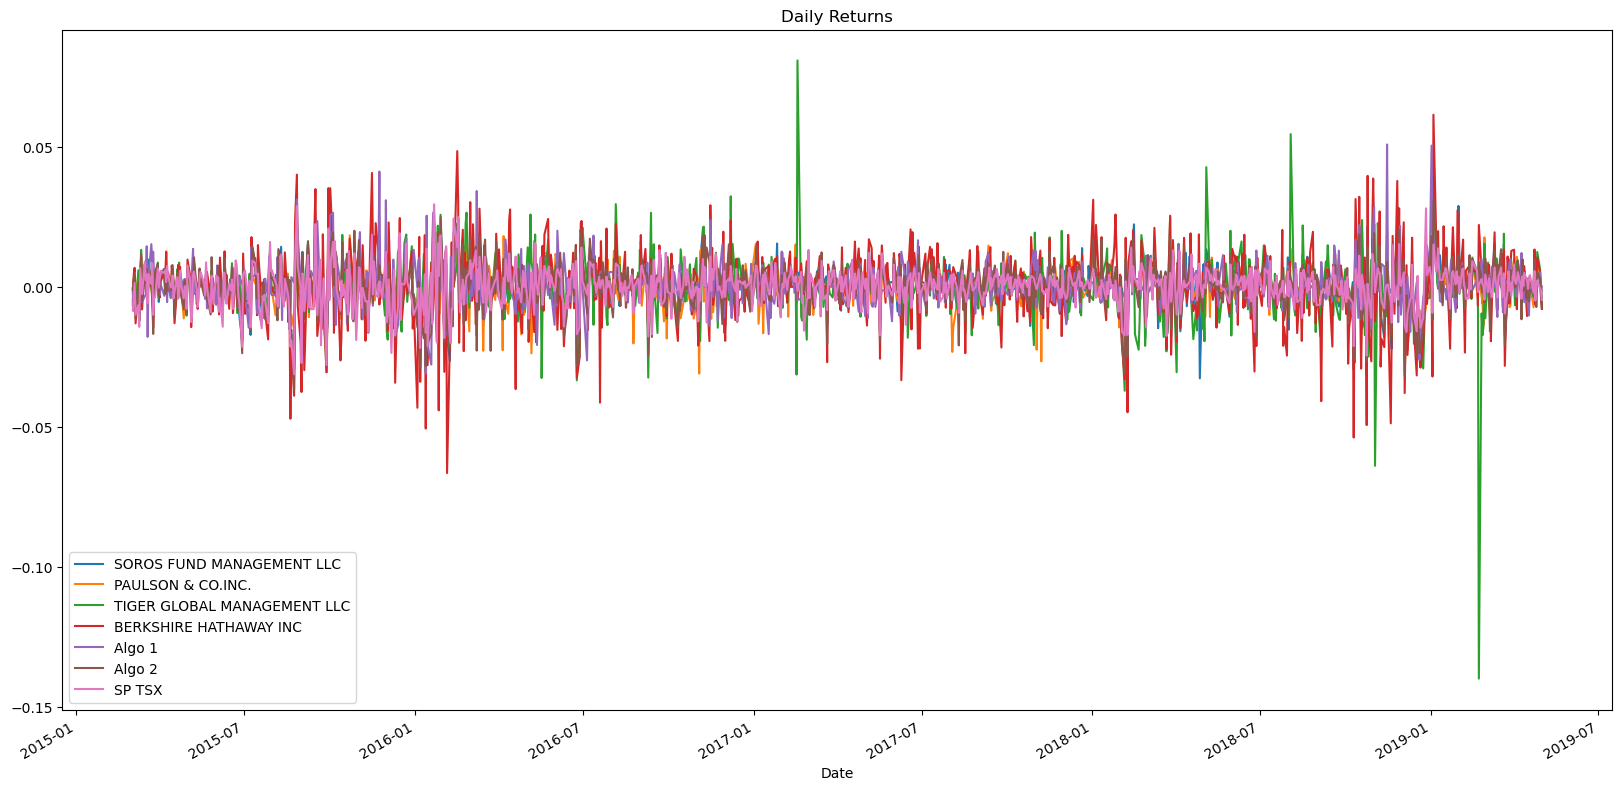

In [18]:
# Plot daily returns of all portfolios
joined_data_cols.plot(title="Daily Returns", figsize=(20, 10))

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

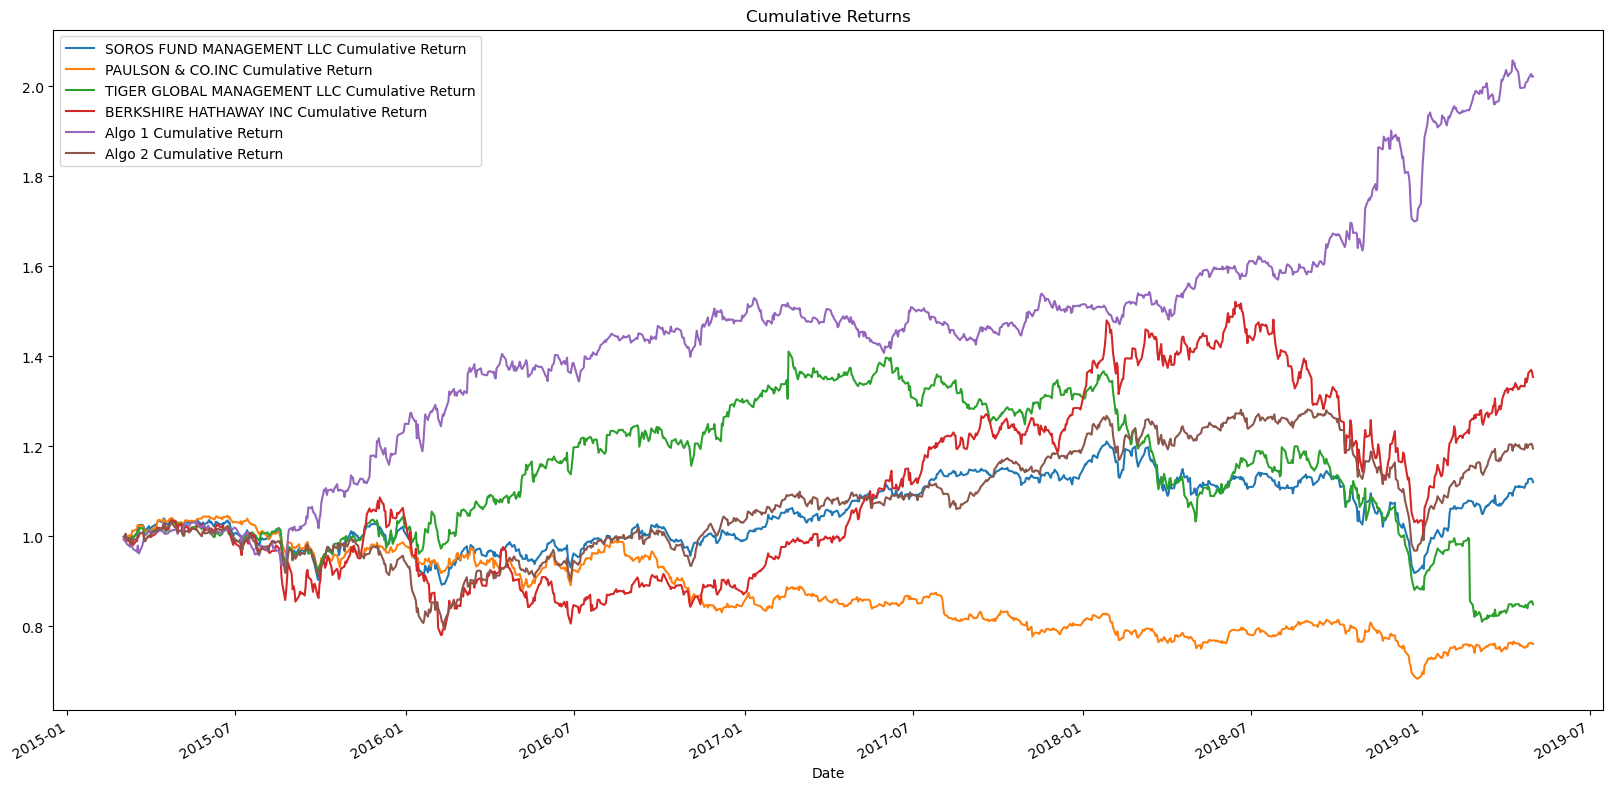

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = pd.DataFrame({
    'SOROS FUND MANAGEMENT LLC Cumulative Return': (1 + joined_data_cols['SOROS FUND MANAGEMENT LLC']).cumprod(),
    'PAULSON & CO.INC Cumulative Return': (1 + joined_data_cols['PAULSON & CO.INC. ']).cumprod(),
    'TIGER GLOBAL MANAGEMENT LLC Cumulative Return': (1 + joined_data_cols['TIGER GLOBAL MANAGEMENT LLC']).cumprod(),    
    'BERKSHIRE HATHAWAY INC Cumulative Return': (1 + joined_data_cols['BERKSHIRE HATHAWAY INC']).cumprod(),
    'Algo 1 Cumulative Return': (1 + joined_data_cols['Algo 1']).cumprod(),
    'Algo 2 Cumulative Return': (1 + joined_data_cols['Algo 2']).cumprod(),
    #'SP TSX Cumulative Return': (1 + joined_daily_data_cols['SP TSX']).cumprod(),    
})
# Plot cumulative returns
cumulative_returns_df.plot(title="Cumulative Returns", figsize=(20, 10))

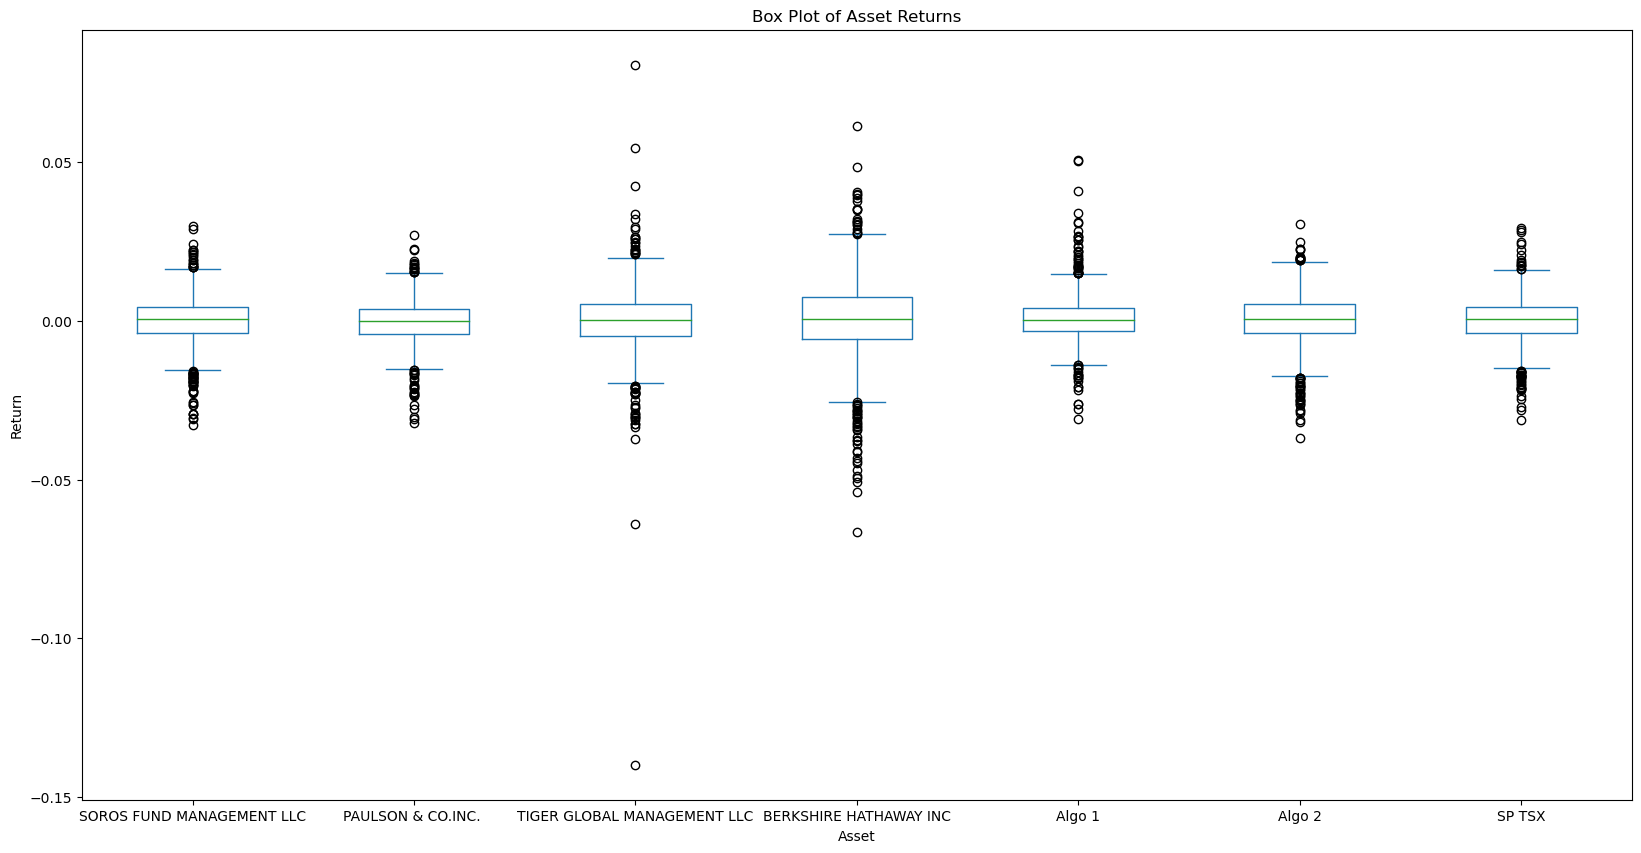

In [20]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20, 10), title='Box Plot of Asset Returns')
plt.ylabel('Return')
plt.xlabel('Asset')
plt.show()

In [21]:
# Calculate the daily standard deviations of all portfolios
soros_daily_std = joined_data_cols['SOROS FUND MANAGEMENT LLC'].std()
paulson_daily_std = joined_data_cols['PAULSON & CO.INC. '].std()
tiger_daily_std = joined_data_cols['TIGER GLOBAL MANAGEMENT LLC'].std()
berk_daily_std = joined_data_cols['BERKSHIRE HATHAWAY INC'].std()
algo1_daily_std = joined_data_cols['Algo 1'].std()
algo2_daily_std = joined_data_cols['Algo 2'].std()

In [22]:
# Calculate the daily standard deviation of S&P TSX 60
sptsx_daily_std = joined_data_cols['SP TSX'].std()
# Determine which portfolios are riskier than the S&P TSX 60
joined_standard_deviation = joined_data_cols.std()
joined_standard_deviation = joined_standard_deviation.sort_values(ascending=False)
joined_standard_deviation

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP TSX                         0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_standard_deviation * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP TSX                         0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<Axes: xlabel='Date'>

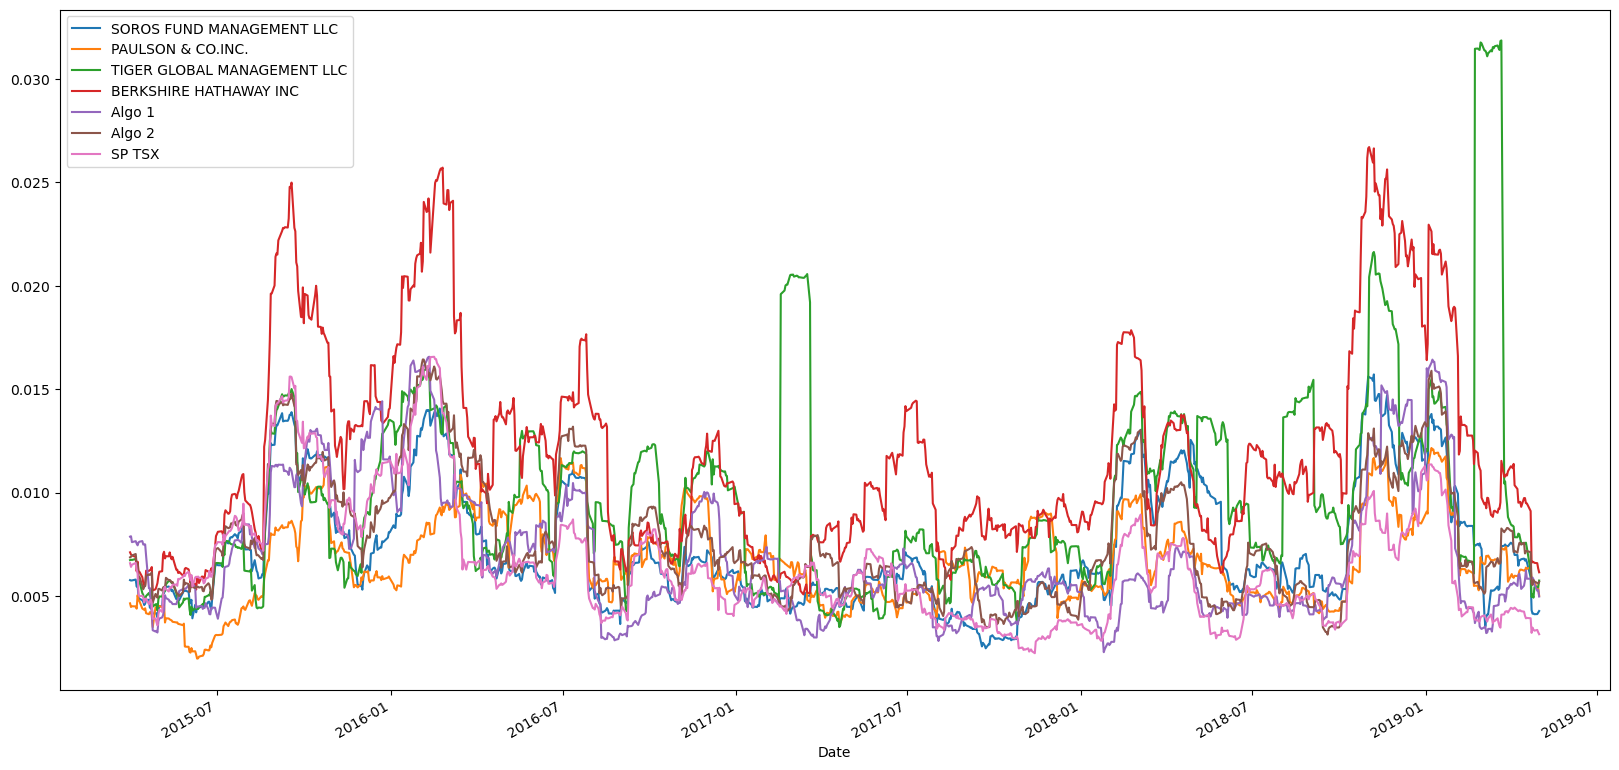

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = joined_data_cols.rolling(window=21).std()
# Plot the rolling standard deviation
rolling.plot(figsize=(20, 10))

In [25]:
# Calculate the correlation
correlation = joined_data_cols.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: >

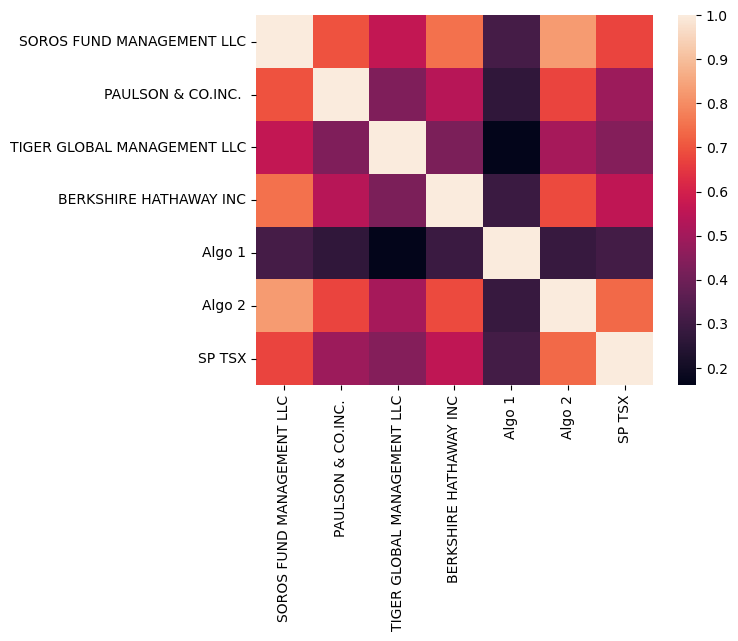

In [26]:
vmin = np.nanmin(correlation)
vmax = np.nanmax(correlation)
sns.heatmap(correlation, vmin=vmin, vmax=vmax)

In [27]:
def beta(x,y):
    # Calculate covariance of a single portfolio
    covariance = x.cov(y)
    # Calculate variance of S&P TSX
    variance = y.var()
    # Computing beta
    beta = covariance / variance
    return beta

In [28]:
beta1 = beta(joined_data_cols['SOROS FUND MANAGEMENT LLC'], joined_data_cols['SP TSX'])
beta1

0.7499446668435332

In [29]:
def rolling_beta(x,y,days):
    rolling_covariance = x.rolling(window=days).cov(y)
    rolling_variance = y.rolling(window=days).var()
    rolling_beta = rolling_covariance / rolling_variance
    return rolling_beta

<Axes: title={'center': 'Rolling 60-Day Beta of Soros Fund Management'}, xlabel='Date'>

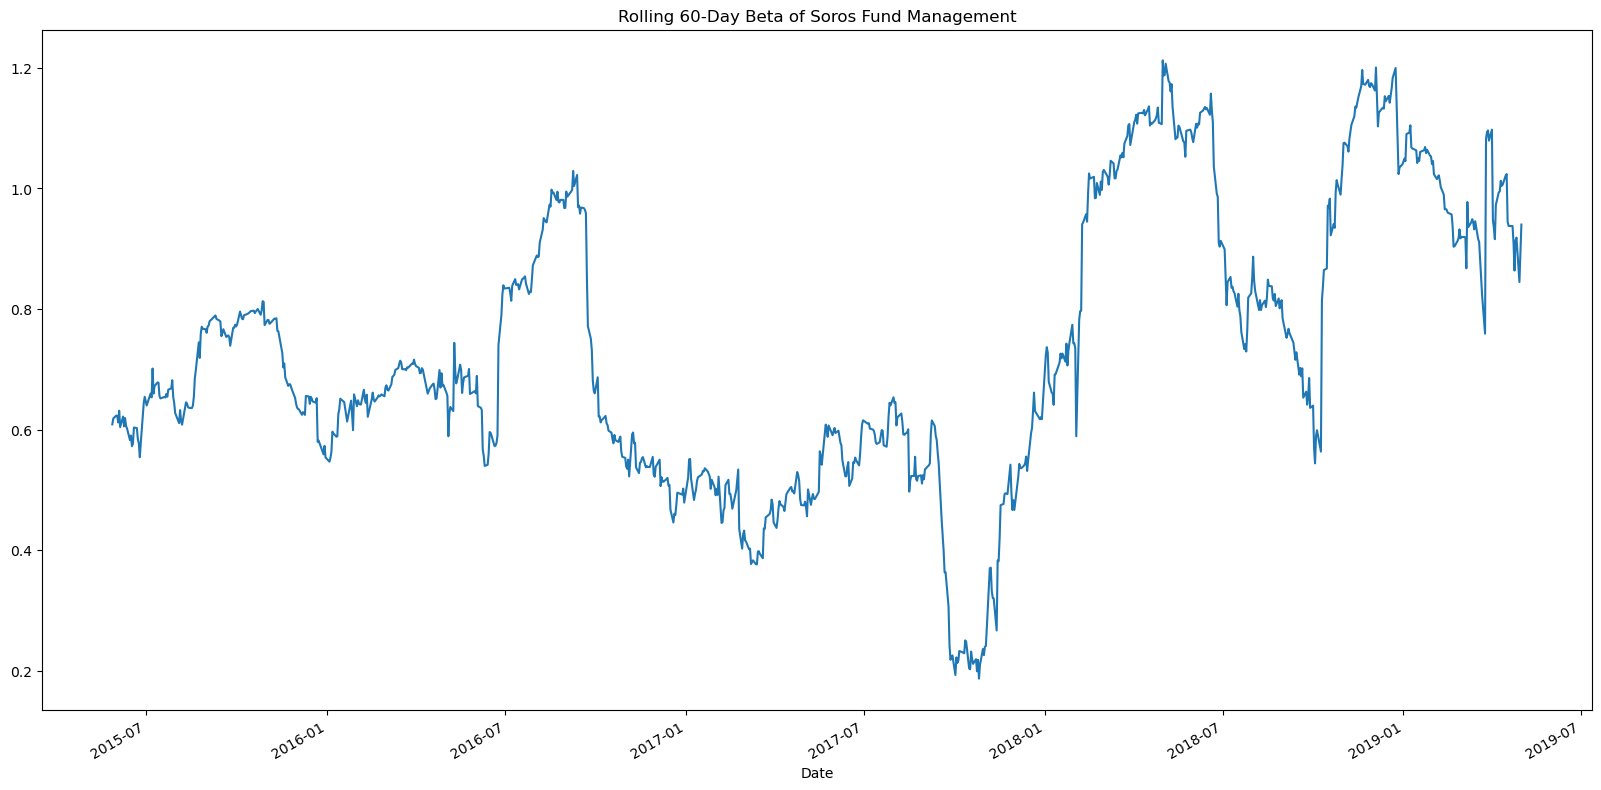

In [30]:
# Plot beta trend
rolling_beta1 = rolling_beta(joined_data_cols['SOROS FUND MANAGEMENT LLC'], joined_data_cols['SP TSX'], 60)
rolling_beta1.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund Management')

In [31]:
# Use `ewm` to calculate the rolling window
exponentially_weighted_average = joined_data_cols.ewm(halflife=21).std()
exponentially_weighted_average

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


<Axes: xlabel='Date'>

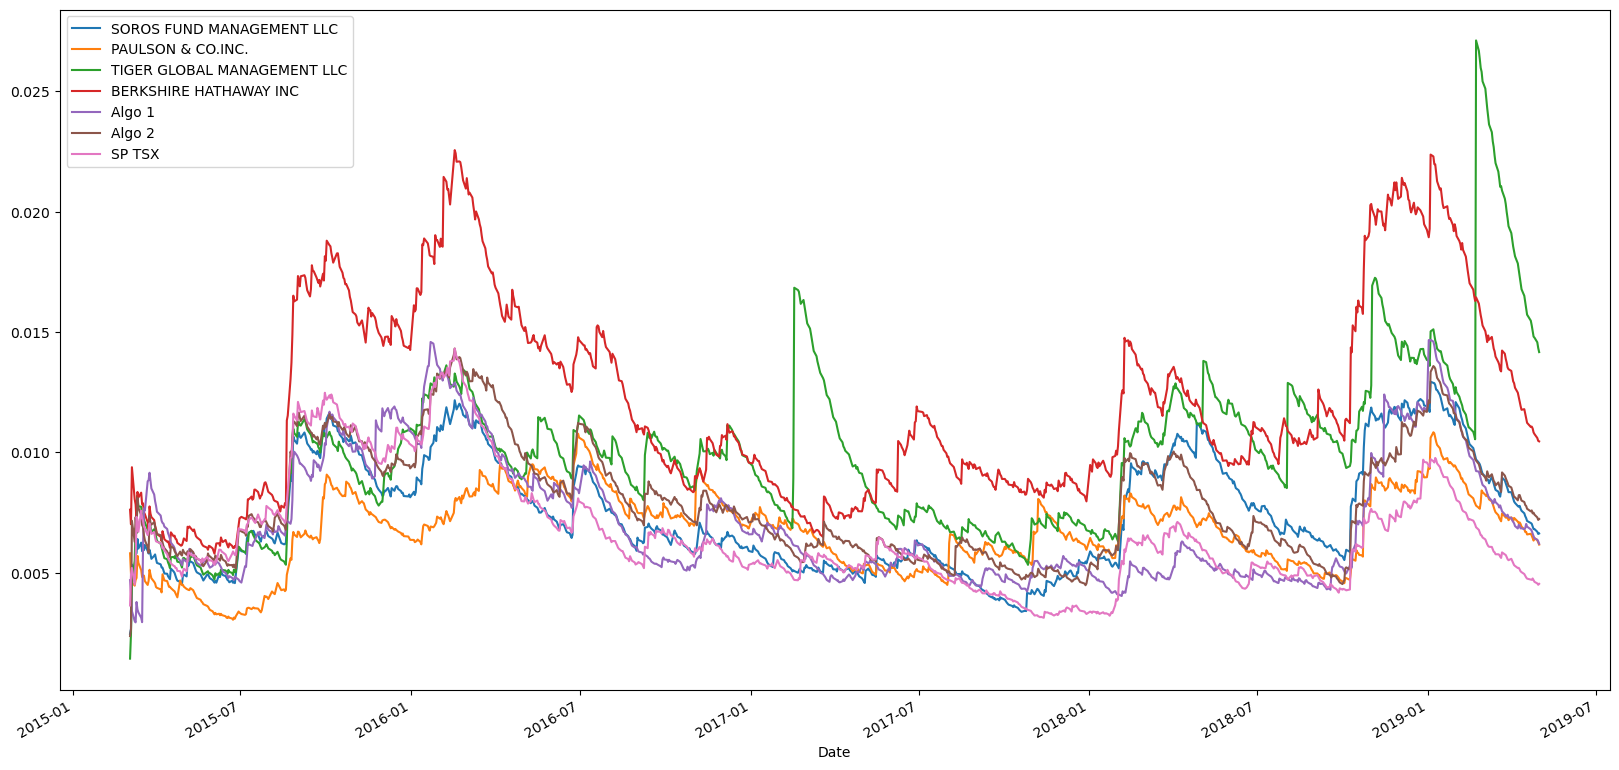

In [32]:
exponentially_weighted_average.plot(figsize=(20, 10))

In [33]:
joined_data_cols

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [34]:
def sharpe_ratio(expected_return, risk_free_return, standard_deviation):
    value = ((expected_return) * 252) / (standard_deviation * np.sqrt(252))
    return value

In [35]:
sharpe_ratio1 = sharpe_ratio(joined_data_cols.mean(), 0, joined_data_cols.std())
sharpe_ratio1

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX                         0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

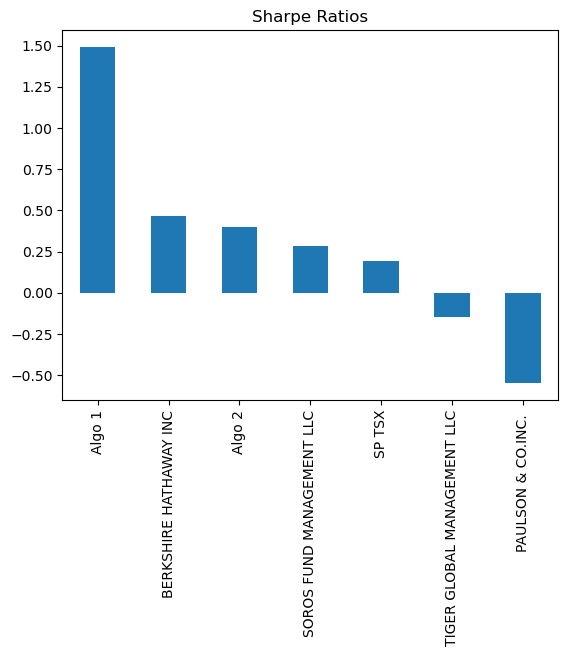

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio1.sort_values(ascending=False).plot(kind="bar", title="Sharpe Ratios")

In [40]:
#stock_data
# Reading data from 1st stock
f_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\fb_google_finance - F.csv")
f_data = pd.read_csv(f_data_path, index_col="Date", parse_dates=True)
f_data = f_data.rename(columns={'Close': 'F'})
#f_data.head()

In [41]:
# Reading data from 2nd stock
hmc_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\fb_google_finance - HMC.csv")
hmc_data = pd.read_csv(hmc_data_path, index_col="Date", parse_dates=True)
hmc_data = hmc_data.rename(columns={'Close': 'HMC'})

In [42]:
# Reading data from 3rd stock
tsla_data_path = Path(r"C:\Users\nikhi\OneDrive\Desktop\Whale analysis\fb_google_finance - TSLA.csv")
tsla_data = pd.read_csv(tsla_data_path, index_col="Date", parse_dates=True)
tsla_data = tsla_data.rename(columns={'Close': 'TSLA'})

In [43]:
# Combine all stocks in a single DataFrame
df_closing_prices = pd.concat([f_data, hmc_data, tsla_data],axis=1)
df_closing_prices.head()

,F,HMC,TSLA
Date,,,
2018-07-16,10.85,29.15,20.67
2018-07-17,10.86,29.64,21.51
2018-07-18,10.87,29.52,21.59
2018-07-19,10.82,29.38,21.35
2018-07-20,10.56,29.19,20.91


In [44]:
# Calculate daily returns
daily_returns = df_closing_prices.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

,F,HMC,TSLA
Date,,,
2018-07-17,0.000922,0.016810,0.040639
2018-07-18,0.000921,-0.004049,0.003719
2018-07-19,-0.004600,-0.004743,-0.011116
2018-07-20,-0.024030,-0.006467,-0.020609
2018-07-23,-0.008523,0.002398,-0.033477


In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-07-17    0.019457
2018-07-18    0.000197
2018-07-19   -0.006820
2018-07-20   -0.017035
2018-07-23   -0.013200
dtype: float64

In [46]:
# Join your returns DataFrame to the original returns DataFrame
#daily_returns["Portfolio"] = portfolio_returns
joined_data_cols["Portfolio"] = portfolio_returns

In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_data_cols = joined_data_cols.dropna().copy()
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Portfolio
Date,,,,,,,,
2018-07-17,0.000130,-0.002424,0.004608,0.001477,-0.002263,0.001961,0.001486,0.019457
2018-07-18,-0.000118,-0.001467,-0.012127,-0.003227,-0.000998,0.001798,-0.002533,0.000197
2018-07-19,-0.004176,-0.004656,-0.004325,-0.007676,0.001159,0.002503,0.003982,-0.006820
2018-07-20,-0.001612,-0.001695,-0.005898,-0.003937,-0.004348,-0.001046,-0.006501,-0.017035
2018-07-23,-0.002118,-0.001390,-0.002287,0.001667,-0.001495,0.002133,-0.000890,-0.013200


In [48]:
# Calculate the annualized `std`
joined_standard_deviation = joined_data_cols.std().sort_values(ascending=False)
annualized_std = joined_standard_deviation * np.sqrt(252)
annualized_std

Portfolio                      0.278416
BERKSHIRE HATHAWAY INC         0.252689
TIGER GLOBAL MANAGEMENT LLC    0.244367
SOROS FUND MANAGEMENT LLC      0.148011
Algo 2                         0.142968
Algo 1                         0.140824
PAULSON & CO.INC.              0.118937
SP TSX                         0.102865
dtype: float64

<Axes: xlabel='Date'>

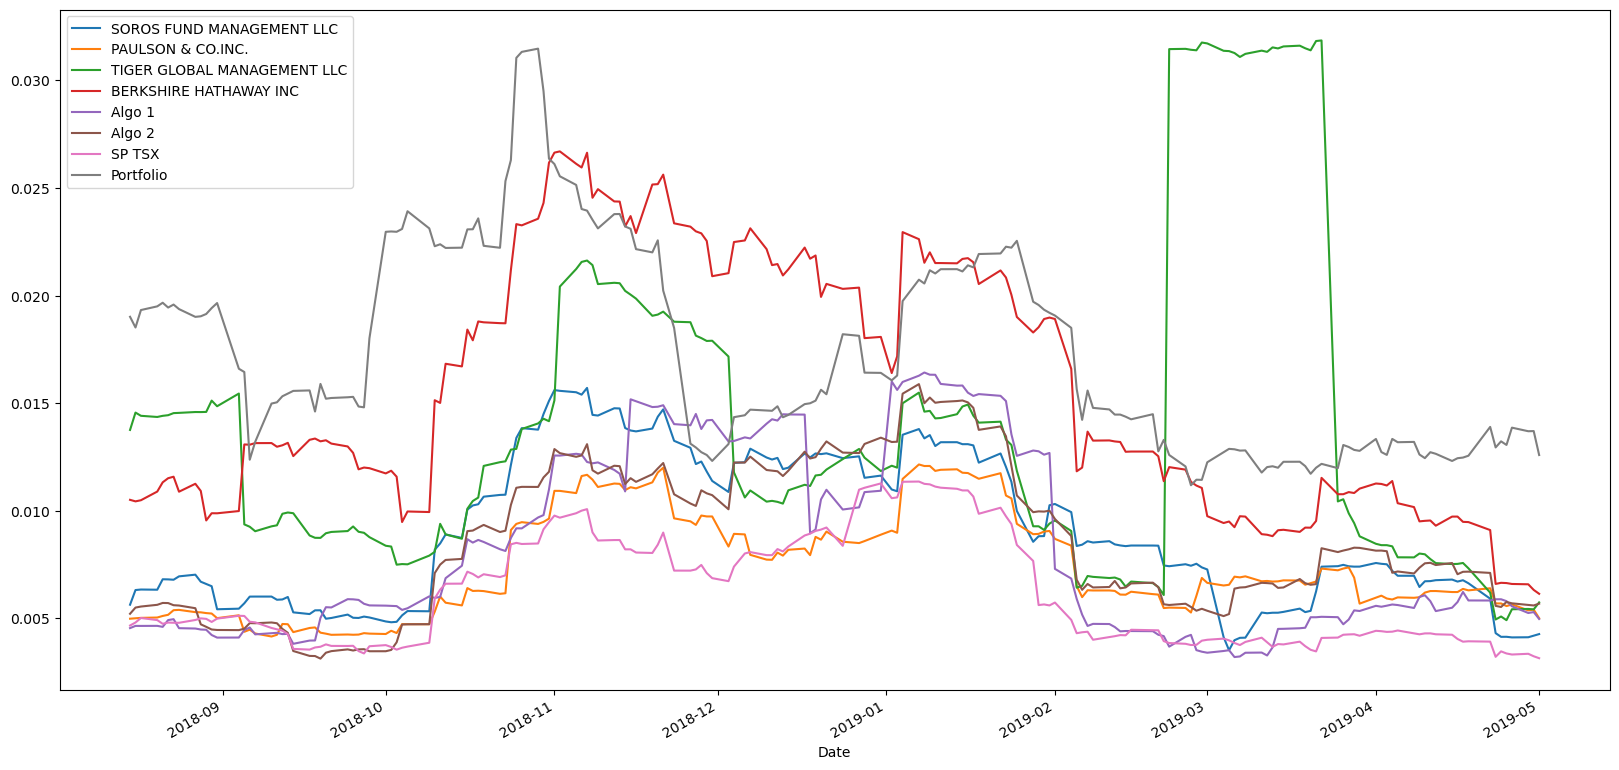

In [49]:
# Calculate rolling standard deviation
rolling = joined_data_cols.rolling(window=21).std()
# Plot rolling standard deviation
rolling.plot(figsize=(20, 10))

In [50]:
# Calculate and plot the correlation
correlation = joined_data_cols.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.778675,0.464050,0.804662,0.349157,0.861885,0.704769,0.466640
PAULSON & CO.INC.,0.778675,1.000000,0.475791,0.637631,0.382231,0.780831,0.582627,0.416597
TIGER GLOBAL MANAGEMENT LLC,0.464050,0.475791,1.000000,0.307220,0.127437,0.387656,0.392867,0.255325
BERKSHIRE HATHAWAY INC,0.804662,0.637631,0.307220,1.000000,0.343398,0.767965,0.655623,0.526460
Algo 1,0.349157,0.382231,0.127437,0.343398,1.000000,0.401843,0.326172,0.161044
Algo 2,0.861885,0.780831,0.387656,0.767965,0.401843,1.000000,0.750965,0.460037
SP TSX,0.704769,0.582627,0.392867,0.655623,0.326172,0.750965,1.000000,0.370615
Portfolio,0.466640,0.416597,0.255325,0.526460,0.161044,0.460037,0.370615,1.000000


<Axes: >

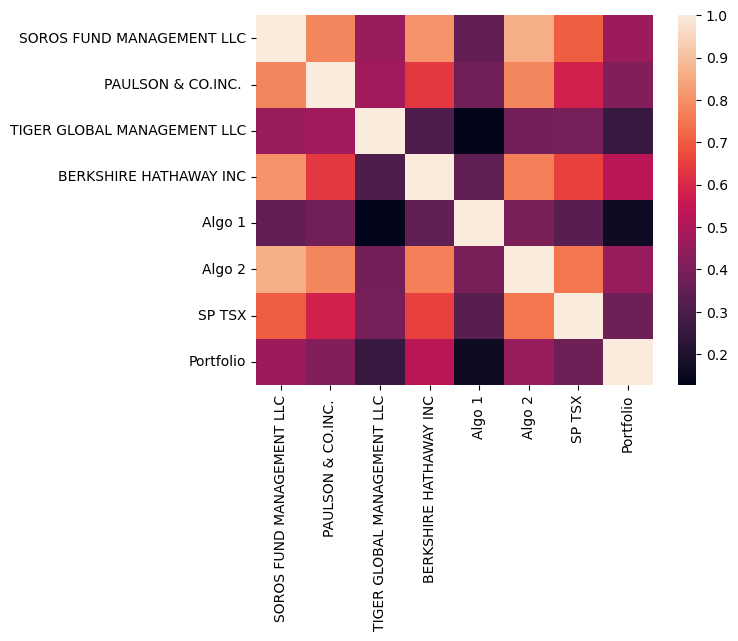

In [51]:
vmin = np.nanmin(correlation)
vmax = np.nanmax(correlation)
sns.heatmap(correlation, vmin=vmin, vmax=vmax)

<Axes: title={'center': 'Rolling 60-Day Beta of Portfolio'}, xlabel='Date'>

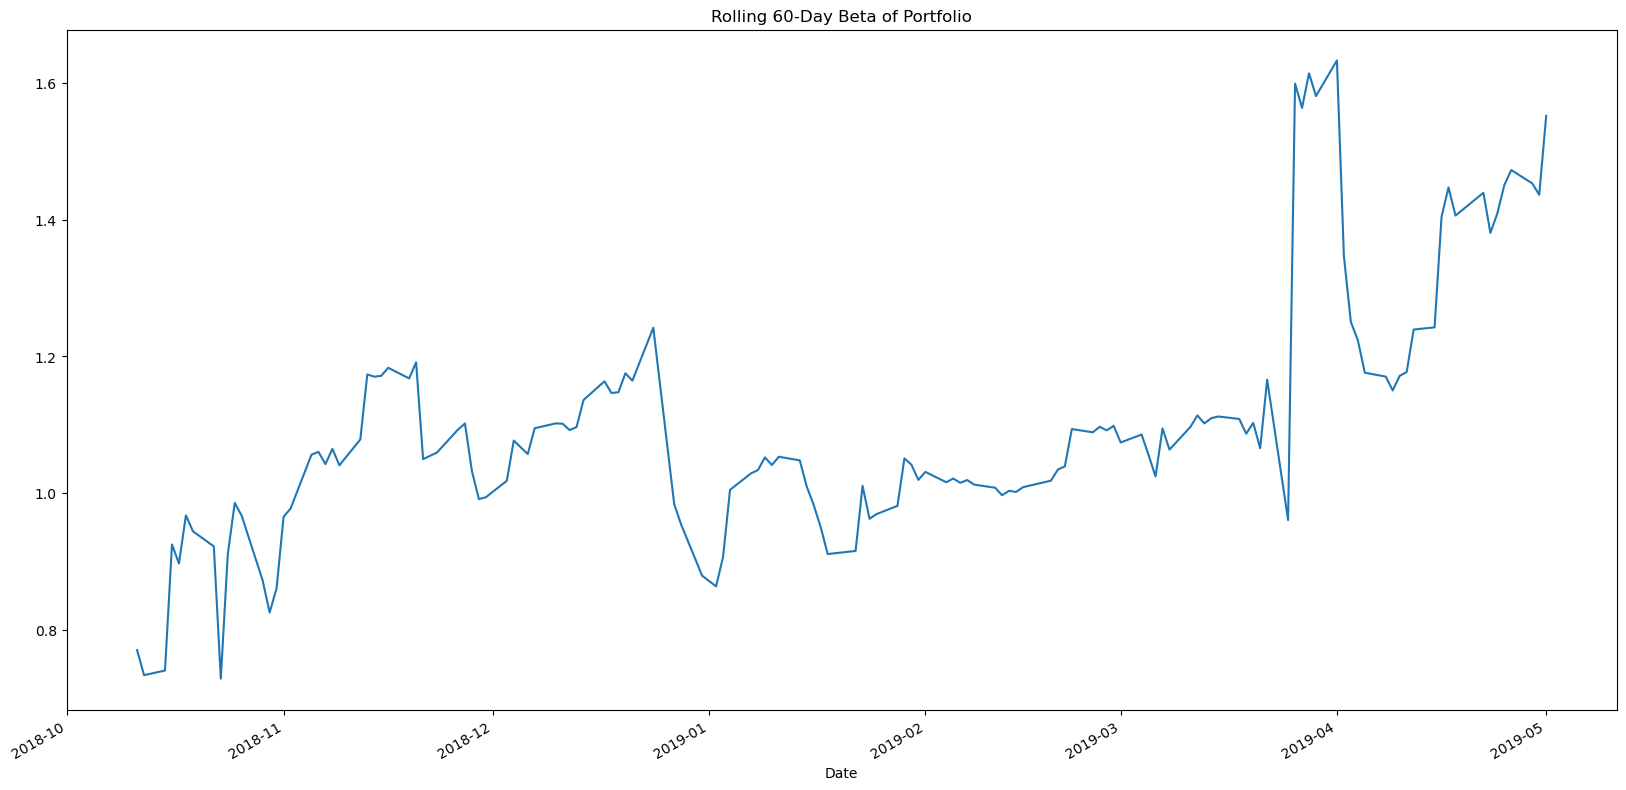

In [52]:
rolling_beta2 = rolling_beta(joined_data_cols["Portfolio"], joined_data_cols['SP TSX'], 60)
rolling_beta2.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Portfolio')

In [53]:
sharpe_ratio2 = sharpe_ratio(joined_data_cols.mean(), 0, joined_data_cols.std())
sharpe_ratio2.sort_values(ascending=False)

Algo 1                         2.139963
SOROS FUND MANAGEMENT LLC     -0.065666
SP TSX                        -0.079285
BERKSHIRE HATHAWAY INC        -0.284501
PAULSON & CO.INC.             -0.298776
Algo 2                        -0.380828
Portfolio                     -0.421501
TIGER GLOBAL MANAGEMENT LLC   -1.583048
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

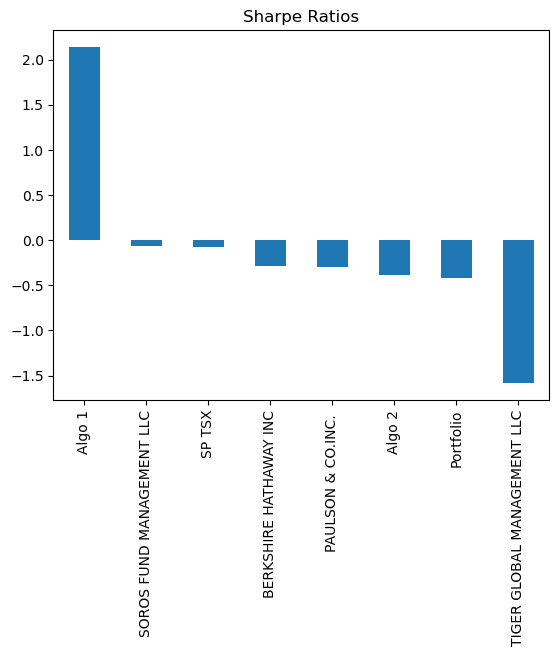

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio2.sort_values(ascending=False).plot(kind="bar", title="Sharpe Ratios")

### How Does Your Portfolio Do?

## Poorly, worse than all of the other portfolios except for Tiger Global Managment LLC.